In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
train = pd.read_csv('extract_train_Jul08.csv')
train = train.drop(['index'], axis = 1)
train = train.drop(train.columns[0],axis = 1)

In [12]:
scaler=StandardScaler() #instantiate
scaler.fit(train) # compute the mean and standard which will be used in the next command
X_scaled=scaler.transform(train)

In [13]:
pca=PCA() 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled)
# df = pd.DataFrame(X_pca[:,:9])
# df.to_csv('pca_exported_9features.csv')
#let's check the shape of X_pca array
#print("shape of X_pca", X_pca.shape)

In [14]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[3.45775570e-01 1.82019887e-01 1.06102444e-01 7.26309244e-02
 7.07164380e-02 6.52734196e-02 6.25635949e-02 5.68368612e-02
 2.40610549e-02 7.20783928e-03 3.03562514e-03 2.38109465e-03
 9.54690475e-04 3.97603152e-04 4.29537136e-05]


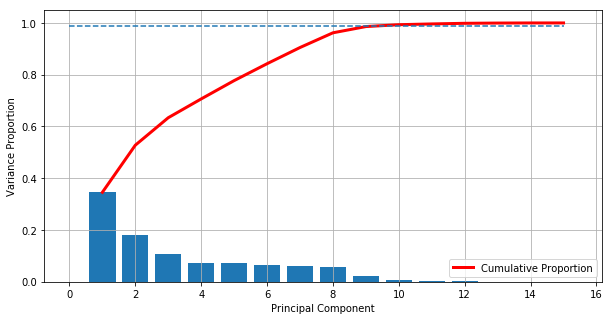

In [15]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(1,16),pca.explained_variance_ratio_, linewidth=3)
plt.plot(np.arange(1,16),np.cumsum(pca.explained_variance_ratio_), linewidth=3, c = 'r', label = 'Cumulative Proportion')
plt.legend()
plt.xlabel('Principal Component')
plt.ylabel('Variance Proportion')
plt.grid()
plt.plot([0.99]*16, '--')

In [16]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[3.45775570e-01 1.82019887e-01 1.06102444e-01 7.26309244e-02
 7.07164380e-02 6.52734196e-02 6.25635949e-02 5.68368612e-02
 2.40610549e-02 7.20783928e-03 3.03562514e-03 2.38109465e-03
 9.54690475e-04 3.97603152e-04 4.29537136e-05]


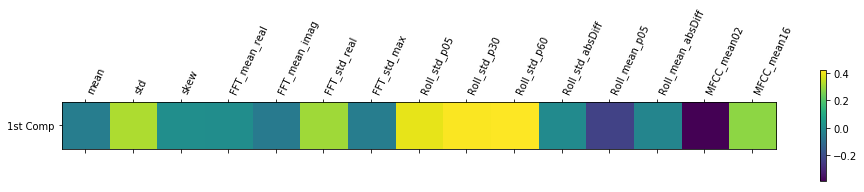

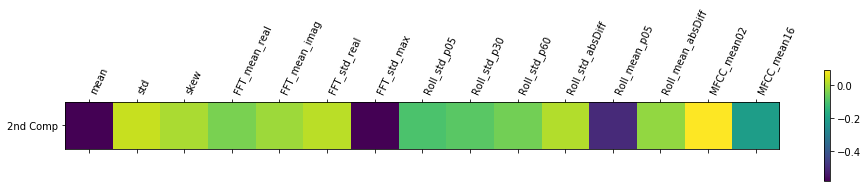

In [20]:
#plt.matshow(pca.components_,cmap='viridis')
#print(pca.components_[0])
plt.matshow([pca.components_[0]],cmap='viridis')
plt.yticks([0],['1st Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(train.columns)),train.columns,rotation=65,ha='left')
plt.show()

plt.matshow([pca.components_[1]],cmap='viridis')
plt.yticks([0],['2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(train.columns)),train.columns,rotation=65,ha='left')
plt.show()#

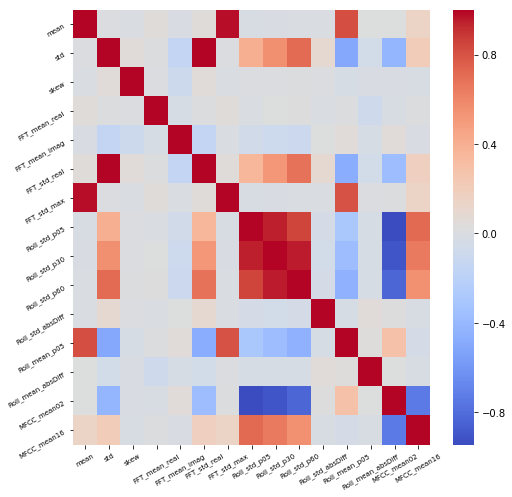

In [70]:
features = test.columns
import seaborn as sns

plt.figure(figsize=(8,8))
s=sns.heatmap(test.corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
plt.show()

In [103]:
a = np.abs(pca.components_[0])
a = a/np.max(a)
df = pd.DataFrame()
df['features'] = test.columns
df['importance'] = a
df.to_csv('PCA_extracted.csv')
print(df.shape)

(15, 2)


In [21]:
pca=PCA(n_components = 9) 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled)
df = pd.DataFrame(X_pca)
df.to_csv('pca_exported_9features.csv')